In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
train['CabinBooked'] = train['Cabin'].apply( lambda x: 0 if (pd.isna(x)) else 1)
test['CabinBooked'] = test['Cabin'].apply(lambda x: 0 if (pd.isna(x)) else 1)

In [12]:
train.drop(['PassengerId','Name','Ticket','Cabin'], axis=1 , inplace=True)
test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

In [13]:
train.isna().sum()

Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
CabinBooked      0
dtype: int64

In [14]:
test.isna().sum()

Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
CabinBooked     0
dtype: int64

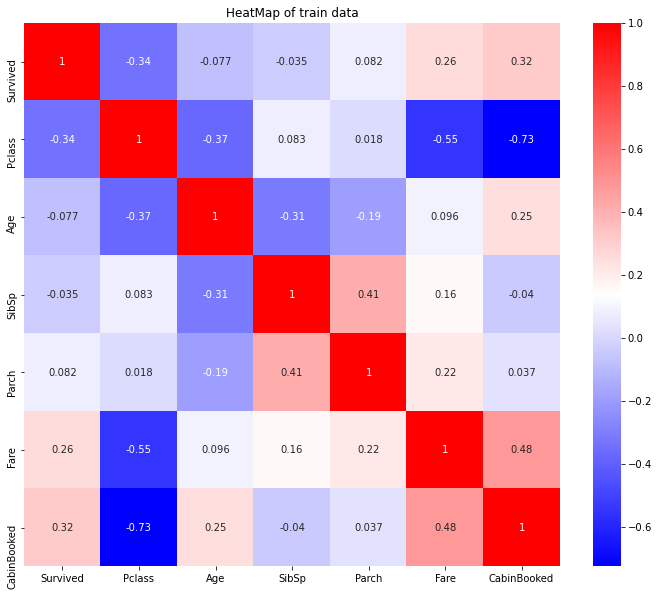

In [15]:
plt.figure(figsize=[12,10])
sns.heatmap(train.corr(),annot=True, cmap='bwr')
plt.title('HeatMap of train data')
plt.show()

In [16]:
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

In [17]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [18]:
train.isna().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
CabinBooked    0
dtype: int64

In [19]:
test.isna().sum()

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
CabinBooked    0
dtype: int64

In [20]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBooked
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [21]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBooked
0,3,male,34.5,0,0,7.8292,Q,0
1,3,female,47.0,1,0,7.0000,S,0
2,2,male,62.0,0,0,9.6875,Q,0
3,3,male,27.0,0,0,8.6625,S,0
4,3,female,22.0,1,1,12.2875,S,0


In [22]:
train_df = pd.get_dummies(data= train, columns=['Sex','Embarked'], drop_first=True)
test_df = pd.get_dummies(data= test, columns=['Sex','Embarked'], drop_first=True)

In [23]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,CabinBooked,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,1


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
train_df[['Age','Fare']] = scaler.fit_transform(train_df[['Age','Fare']])

In [27]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,CabinBooked,Sex_male,Embarked_Q,Embarked_S
0,0,3,-0.565736,1,0,-0.502445,0,1,0,1
1,1,1,0.663861,1,0,0.786845,1,0,0,0
2,1,3,-0.258337,0,0,-0.488854,0,0,0,1
3,1,1,0.433312,1,0,0.420730,1,0,0,1
4,0,3,0.433312,0,0,-0.486337,0,1,0,1


In [28]:
test_df[['Age','Fare']] = scaler.fit_transform(test_df[['Age','Fare']])

In [29]:
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,CabinBooked,Sex_male,Embarked_Q,Embarked_S
0,3,0.386231,0,0,-0.497413,0,1,1,0
1,3,1.371370,1,0,-0.512278,0,0,0,1
2,2,2.553537,0,0,-0.464100,0,1,1,0
3,3,-0.204852,0,0,-0.482475,0,1,0,1
4,3,-0.598908,1,1,-0.417492,0,0,0,1


In [30]:
x_train = train_df.drop(['Survived'], axis=1)
y_train = train_df['Survived']

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr = LogisticRegression()

In [33]:
lr.fit(x_train, y_train)

LogisticRegression()

In [34]:
lr_pred = lr.predict(test_df)

In [35]:
test_val = pd.read_csv('gender_submission.csv')

In [36]:
test_val.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve

In [38]:
confusion_matrix(y_true= test_val['Survived'], y_pred= lr_pred)

array([[247,  19],
       [ 10, 142]], dtype=int64)

In [39]:
print('Accuracy Score = ', np.round(accuracy_score(y_true= test_val['Survived'], y_pred= lr_pred)*100, 2))

Accuracy Score =  93.06


In [40]:
predData01 = pd.DataFrame(lr_pred)
Dataset01 = pd.concat([test_val['PassengerId'], predData01], axis=1)

In [43]:
Dataset01.columns = ['PassengerId','Survived']

In [44]:
Dataset01.to_csv('gender_submission01.csv', index=False)

## Score: 0.75837  Rank : 12649

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rfc = RandomForestClassifier(random_state=123)

In [47]:
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=123)

In [48]:
rfc_pred = rfc.predict(test_df)

In [49]:
confusion_matrix(y_true= test_val['Survived'], y_pred= rfc_pred)

array([[224,  42],
       [ 42, 110]], dtype=int64)

In [50]:
print('Accuracy Score = ', np.round(accuracy_score(y_true= test_val['Survived'], y_pred= rfc_pred)*100, 2))

Accuracy Score =  79.9


In [51]:
predData02 = pd.DataFrame(rfc_pred)
Dataset02 = pd.concat([test_val['PassengerId'], predData02], axis=1)

In [52]:
Dataset02.columns = ['PassengerId','Survived']

In [53]:
Dataset02.to_csv('gender_submission02.csv', index=False)

## Score: 0.75837  Rank : 12650

In [62]:
param = {'max_depth' : [3,7,9,13],
         'n_estimators' : [100,200,300,400,500] }

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
rnd = RandomizedSearchCV(estimator= rfc, param_distributions= param, cv= 10, n_jobs=-1, verbose=1)

In [65]:
rnd.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=123),
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 7, 9, 13],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=1)

In [66]:
rnd.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=500, random_state=123)

In [67]:
rnd_pred = rnd.predict(test_df)

In [68]:
confusion_matrix(y_true= test_val['Survived'], y_pred= rnd_pred)

array([[248,  18],
       [ 30, 122]], dtype=int64)

In [69]:
print('Accuracy Score = ', np.round(accuracy_score(y_true= test_val['Survived'], y_pred= rnd_pred)*100, 2))

Accuracy Score =  88.52


In [70]:
predData03 = pd.DataFrame(rnd_pred)
Dataset03 = pd.concat([test_val['PassengerId'], predData03], axis=1)

In [71]:
Dataset03.columns = ['PassengerId','Survived']

In [72]:
Dataset03.to_csv('gender_submission03.csv', index=False)

## Score: 0.77990 Rank : 3555

In [73]:
lr_param = {'C' : [0.001, 0.01, 0.1, 1, 10**1, 10**2, 10**3], 'penalty' : ['l1','l2'] }

In [74]:
lr_rnd = RandomizedSearchCV(estimator= lr, param_distributions= lr_param, cv=10, n_jobs=-1)

In [75]:
lr_rnd.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan 0.62629213
 0.79570537 0.79570537 0.74302122        nan]
  warnings.warn(


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2']})

In [76]:
lr_rnd.best_estimator_

LogisticRegression(C=10)

In [77]:
lr_rnd_pred = lr_rnd.predict(test_df)

In [78]:
confusion_matrix(y_true= test_val['Survived'], y_pred= lr_rnd_pred)

array([[247,  19],
       [ 10, 142]], dtype=int64)

In [79]:
print('Accuracy Score = ', np.round(accuracy_score(y_true= test_val['Survived'], y_pred= lr_rnd_pred)*100, 2))

Accuracy Score =  93.06


In [89]:
from xgboost import XGBClassifier

In [90]:
xgbc = XGBClassifier()

In [91]:
x_param = {'base_score' : [0.1,0.2,0.3,0.4,0.5],
          'n_estimators': [100,200,300,400,500],
          'max_depth' : [3,5,7,9,13,15],
          'learning_rate' : [0.01,0.1,0.15,0.2] }

In [92]:
r_rnd = RandomizedSearchCV(estimator= xgbc, param_distributions= x_param, cv= 10, n_jobs=5, verbose=12)

In [93]:
r_rnd.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[23:00:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraint...
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                    

In [94]:
r_rnd.best_estimator_

XGBClassifier(base_score=0.1, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [95]:
r_rnd_pred = r_rnd.predict(test_df)

In [96]:
confusion_matrix(y_true= test_val['Survived'], y_pred= r_rnd_pred)

array([[251,  15],
       [ 30, 122]], dtype=int64)

In [97]:
print('Accuracy Score = ', np.round(accuracy_score(y_true= test_val['Survived'], y_pred= r_rnd_pred)*100, 2))

Accuracy Score =  89.23


In [98]:
predData04 = pd.DataFrame(r_rnd_pred)
Dataset04 = pd.concat([test_val['PassengerId'], predData04], axis=1)

In [99]:
Dataset04.columns = ['PassengerId','Survived']

In [100]:
Dataset04.to_csv('gender_submission04.csv', index=False)